In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('smsspamcollection.tsv',sep='\t')

In [6]:
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [7]:
df.isnull().sum()            #null values in each column and their sum

label      0
message    0
length     0
punct      0
dtype: int64

In [8]:
df.describe()             # Describe the data like count, mean, std....   (statistic part)

,length,punct
count,5572.000000,5572.000000
mean,80.489950,4.177495
std,59.942907,4.623919
min,2.000000,0.000000
25%,36.000000,2.000000
50%,62.000000,3.000000
75%,122.000000,6.000000
max,910.000000,133.000000


In [9]:
df['label'].value_counts()                   #check the numbe of spam and ham

ham     4825
spam     747
Name: label, dtype: int64

# Balancing the data

In [10]:
# select the ham data
ham = df[df['label']=='ham']
ham.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2
6,ham,Even my brother is not like to speak with me. ...,77,2


In [11]:
# select the spam data
spam = df[df['label']=='spam']
spam.head()

,label,message,length,punct
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
5,spam,FreeMsg Hey there darling it's been 3 week's n...,147,8
8,spam,WINNER!! As a valued network customer you have...,157,6
9,spam,Had your mobile 11 months or more? U R entitle...,154,2
11,spam,"SIX chances to win CASH! From 100 to 20,000 po...",136,8


In [12]:
# check the shape of data
ham.shape, spam.shape

((4825, 4), (747, 4))

In [13]:
spam.shape[0]

747

In [14]:
# Now we have to select 747 samples from ham to balance the data

In [15]:
ham = ham.sample(spam.shape[0])

In [16]:
ham.shape

(747, 4)

In [17]:
# now the size of ham and spam data is same, now this is the balanced data
ham.shape, ham.shape

((747, 4), (747, 4))

In [18]:
# Append spam data into spam data
data = ham.append(spam, ignore_index=True)

C:\Users\Dell\AppData\Local\Temp\ipykernel_16888\3630247205.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = ham.append(spam, ignore_index=True)


In [19]:
data.head()

,label,message,length,punct
0,ham,That's the way you should stay oh.,34,2
1,ham,"Yo, the game almost over? Want to go to walmar...",52,2
2,ham,Tmr timin still da same wat cos i got lesson u...,55,3
3,ham,Yes. Last practice,19,1
4,ham,Wat's my dear doing? Sleeping ah?,33,3


In [20]:
# check the shape of data
ham.shape, spam.shape

((747, 4), (747, 4))

In [21]:
data.shape

(1494, 4)

In [22]:
data

,label,message,length,punct
0,ham,That's the way you should stay oh.,34,2
1,ham,"Yo, the game almost over? Want to go to walmar...",52,2
2,ham,Tmr timin still da same wat cos i got lesson u...,55,3
3,ham,Yes. Last practice,19,1
4,ham,Wat's my dear doing? Sleeping ah?,33,3
...,...,...,...,...
1489,spam,Want explicit SEX in 30 secs? Ring 02073162414...,90,3
1490,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,158,5
1491,spam,Had your contract mobile 11 Mnths? Latest Moto...,160,8
1492,spam,REMINDER FROM O2: To get 2.50 pounds free call...,147,3


# Data Visualization

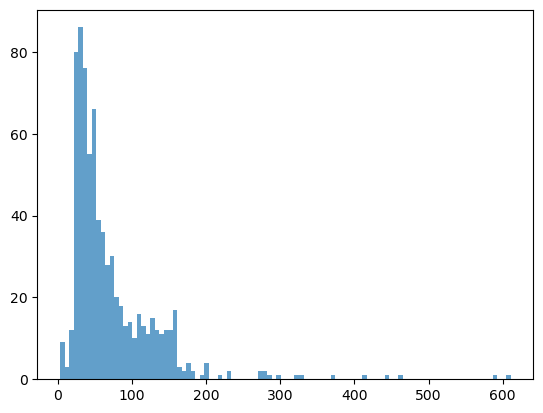

In [23]:
# Plot histogram of length for ham messages
plt.hist(data[data['label']=='ham']['length'],bins=100, alpha=0.7)
plt.show()
# from the histogram we can say that, the number of charactors in ham messages are less than 1

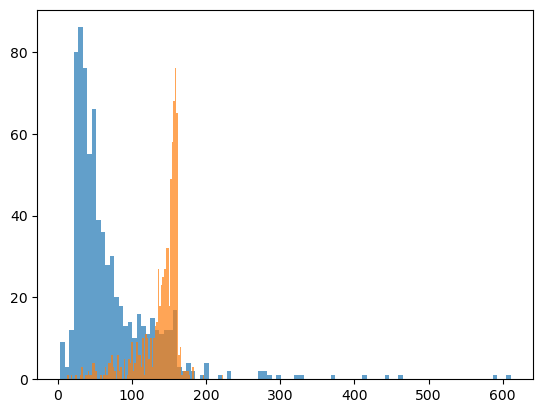

In [24]:
# Plot histogram of length for ham and spam both messages
plt.hist(data[data['label']=='ham']['length'],bins=100, alpha=0.7)
plt.hist(data[data['label']=='spam']['length'],bins=100, alpha=0.7)
plt.show()

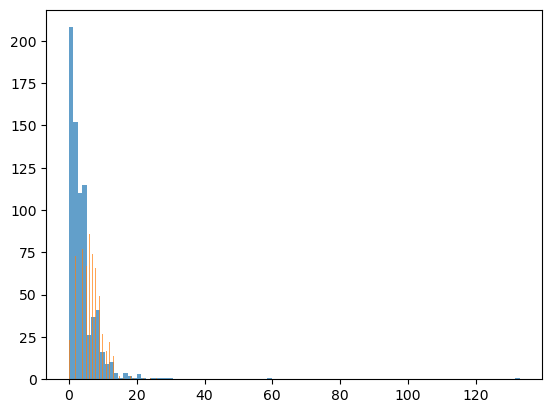

In [25]:
# Plot histogram of punct for ham and spam both messages
plt.hist(data[data['label']=='ham']['punct'],bins=100, alpha=0.7)
plt.hist(data[data['label']=='spam']['punct'],bins=100, alpha=0.7)
plt.show()

# Split the data into train and text sets

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
x_train, x_test, y_train, y_test = train_test_split(data['message'], data['label'], test_size=0.3, random_state=42)

# Building the model(Random Forest)

In [28]:
from sklearn.pipeline import Pipeline

#there will be lot of repeated processes for training and testing the dataset separately, to avoid that we are using pipeline

from sklearn.feature_extraction.text import TfidfVectorizer

#we are importing Tfidfvectorizer to utilize bag of words model in sklearn

from sklearn.ensemble import RandomForestClassifier



In [29]:
classifier = Pipeline([('tfidf', TfidfVectorizer()), ('classifier', RandomForestClassifier(n_estimators=100))])

In [30]:
classifier.fit(x_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('classifier', RandomForestClassifier())])

# Predicting the result(Random Forest)

In [31]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [32]:
y_pred = classifier.predict(x_test)

In [33]:
# confusion matrix
confusion_matrix(y_test, y_pred)

array([[214,   3],
       [ 22, 210]], dtype=int64)

In [35]:
#classification_report
print(classification_report(y_test, y_pred))
# we are getting almost 95% accuracy

              precision    recall  f1-score   support

         ham       0.91      0.99      0.94       217
        spam       0.99      0.91      0.94       232

    accuracy                           0.94       449
   macro avg       0.95      0.95      0.94       449
weighted avg       0.95      0.94      0.94       449



In [36]:
accuracy_score(y_test, y_pred)

0.9443207126948775

In [37]:
# predict a real message 
classifier.predict(['Hello, You are learning Natural Language Processing'])

array(['ham'], dtype=object)

In [38]:
classifier.predict(['Hope you are doing good and learning new things !'])

array(['ham'], dtype=object)

In [39]:
classifier.predict([' Congratulations, You won a lottery ticket worth $1 Million ! To claim '])

array(['spam'], dtype=object)

In [40]:
classifier.predict([' Congratulations - you are a winner! Go to bit.ly/eFgHiJK to claim your $500 Walmart gift card.'])

array(['spam'], dtype=object)